In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getDistribution(file):
    with open(file, 'r') as f:
        data = f.read().split("\n")[:-1]
    nb_cities = int(np.sqrt(len(data)))
    distribution = np.array(data).reshape((nb_cities, nb_cities)).astype(np.float64) *100

    count = 0
    total = 1
    for i in range(distribution.shape[0]):
        for j in range(distribution.shape[1]):
            if distribution[i][j] != 0:
                total += distribution[i][j]
                count += 1
    mean_distribution = total / count
    
    return distribution, mean_distribution, nb_cities

In [3]:
def getEmpirical(file):
    with open(file, 'r') as f:
        data = f.read().split("\n")[:-1]
    results_probability = np.array(data).astype(np.float64)*100

    histogram = np.histogram(results_probability, range=(0.0, np.ceil(max(results_probability))), bins=15)
    _mean = results_probability.mean()
    _std = results_probability.std()
    
    return results_probability, histogram, _mean, _std

In [4]:
def getPickupCity(file):
    with open(file, 'r') as f:
        data = f.read().split("\n")[:-1]
    pickUp_city = np.array(data).astype(np.int32)
    return pickUp_city

In [12]:
def display(mean_distribution, nb_cities, results_probability, histogram, _mean, _std, pickUp_city):
    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    plt.hist(results_probability, range=(0.0, np.ceil(max(results_probability))), rwidth=0.7, bins=15)
    plt.vlines(_mean, ymin=0, ymax=histogram[0].max(), colors='red')
    plt.vlines(_mean+_std, ymin=0, ymax=histogram[0].max(), colors='green')
    plt.vlines(_mean-_std, ymin=0, ymax=histogram[0].max(), colors='green')
    plt.vlines(mean_distribution, ymin=0, ymax=histogram[0].max(), colors='orange')
    plt.xlabel('Probability of the task choosen')
    plt.ylabel('count')
    plt.grid(True)
    
    plt.subplot(222)
    plt.hist(pickUp_city, rwidth=0.7, bins=nb_cities, range=(0, nb_cities), align='left')
    plt.xlabel('ID of the city choosen')
    plt.ylabel('count')
    
    plt.subplot(224)
    plt.boxplot((np.sort(distribution)[:, 1:]).transpose())
    plt.xlabel('ID of the city choosen')
    plt.ylabel('distribution')
    plt.show()

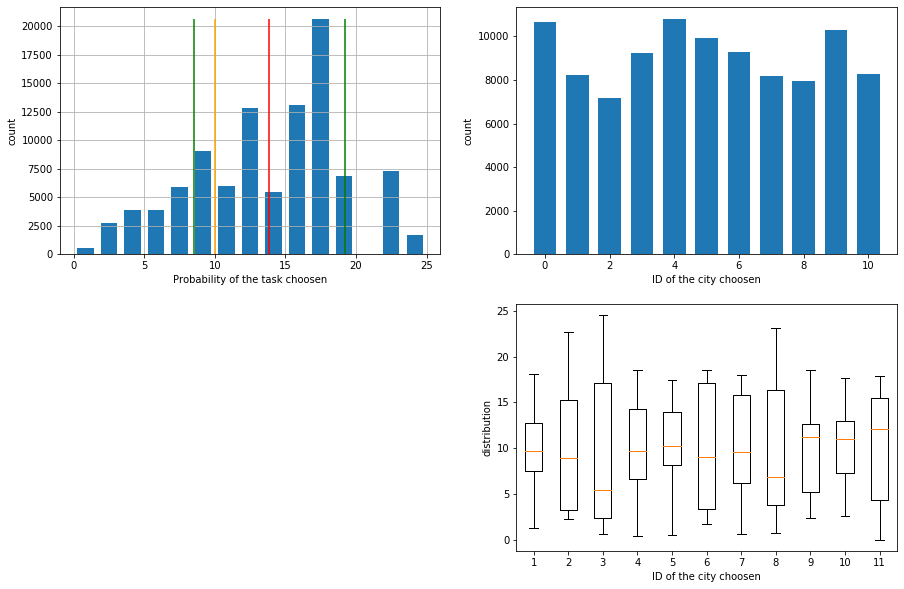

Number of sample :  100000


In [13]:
distribution, mean_distribution, nb_cities = getDistribution("1bis/distribution.txt")
results_probability, histogram, _mean, _std = getEmpirical("1bis/empirical_probability.txt")
pickUp_city = getPickupCity("1bis/empirical_pickUpCity.txt")
display(mean_distribution, nb_cities, results_probability, histogram, _mean, _std, pickUp_city)
print("Number of sample : ", results_probability.size)

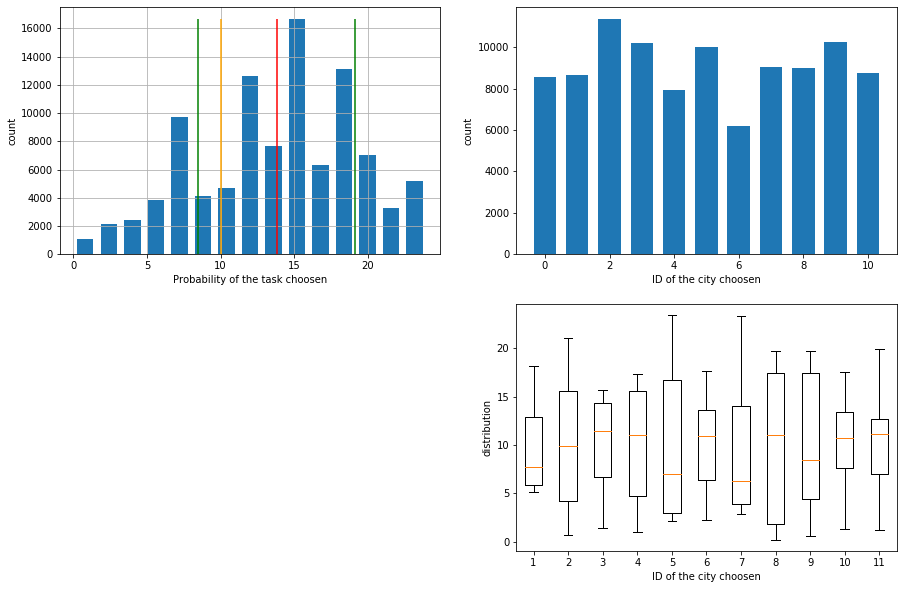

Number of sample :  100000


In [14]:
distribution, mean_distribution, nb_cities = getDistribution("2/distribution.txt")
results_probability, histogram, _mean, _std = getEmpirical("2/empirical_probability.txt")
pickUp_city = getPickupCity("2/empirical_pickUpCity.txt")
display(mean_distribution, nb_cities, results_probability, histogram, _mean, _std, pickUp_city)
print("Number of sample : ", results_probability.size)

In [38]:
(np.sort(distribution)[:, 1:]).mean(axis = 1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [43]:
np.median(np.sort(distribution)[:, 1:], axis=1)

array([ 7.6929713 ,  9.9077535 , 11.40960566, 11.03071953,  6.95072304,
       10.9233848 ,  6.29965194, 11.04630464,  8.40978692, 10.67896033,
       11.16260483])

In [50]:
np.median(np.sort(distribution)[:, 1:], axis=1).argsort()

array([ 6,  4,  0,  8,  1,  9,  5,  3,  7, 10,  2], dtype=int64)

In [57]:
np.where(np.median(np.sort(distribution)[:, 1:], axis=1) < 10, 0, 1)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [65]:
np.count_nonzero(np.where(distribution[[0, 8, 9, 3, 10, 2]] < 10, 0, 1))

30

In [78]:
p =(np.median(np.sort(distribution)[:, 1:], axis=1)/(np.median(np.sort(distribution)[:, 1:], axis=1)).sum())*100
p

array([ 7.29105437,  9.39012596, 10.81351431, 10.45442296,  6.58758464,
       10.35269591,  5.97052856, 10.46919383,  7.97042018, 10.12104132,
       10.57941796])

In [79]:
max(p)

10.813514306236447

In [80]:
min(p)

5.9705285576475635

In [84]:
max(p) /min(p) * 450

815.0168600355337